# Introdução

In [156]:
import yfinance as yf
import pandas as pd

import pandas as pd 
import numpy as np 
import math
import matplotlib. pyplot as plt 
import seaborn as sns 
from scipy import stats


In [157]:
pd.set_option('display.max_rows', None)
pd.options.display.float_format = "{:,.2f}".format
pd.set_option('display.max_columns', None)

In [158]:
tickers = ['WEGE3.SA','AURE3.SA','LEVE3.sa','CSMG3.SA'
           ,'PETR4.SA','PETR3.SA','MTRE3.SA','BRAP4.SA','BRAP3.SA'
           ,'GOAU4.SA','AGRO3.SA','SLCE3.SA'
           ,'VALE3.SA','CPFE3.SA','SBSP3.SA'
           ,'ITUB3.SA','ITUB4.SA','BMGB4.SA']

stocks = yf.download(tickers,period='2y', interval='1d')

df = pd.DataFrame(stocks['Adj Close']).reset_index()

df.set_index('Date')

#df.rename(columns={'AMER3.SA':'AMERICANAS','MGLU3.SA':'MAGALU'}, inplace=True)

#df.columns.droplevel(1)

df.tail()

[*********************100%%**********************]  18 of 18 completed


Ticker,Date,AGRO3.SA,AURE3.SA,BMGB4.SA,BRAP3.SA,BRAP4.SA,CPFE3.SA,CSMG3.SA,GOAU4.SA,ITUB3.SA,ITUB4.SA,LEVE3.SA,MTRE3.SA,PETR3.SA,PETR4.SA,SBSP3.SA,SLCE3.SA,VALE3.SA,WEGE3.SA
496,2024-07-08,26.93,12.34,3.55,18.50,18.99,33.46,20.90,10.53,28.36,32.87,33.49,4.02,41.22,38.44,83.11,19.02,63.10,44.47
497,2024-07-09,26.83,12.40,3.55,18.62,19.10,33.37,20.69,10.55,28.55,33.10,33.22,4.01,40.89,38.43,84.27,19.09,63.02,44.55
498,2024-07-10,26.74,12.41,3.56,18.45,18.97,33.46,20.75,10.52,28.59,33.45,33.10,4.11,40.77,38.07,85.10,19.12,62.17,44.05
499,2024-07-11,27.02,12.45,3.56,18.59,19.16,33.71,20.60,10.66,28.82,33.65,33.70,4.42,41.11,38.33,84.33,19.16,62.01,44.96
500,2024-07-12,27.19,12.48,3.58,18.49,19.24,33.79,20.66,10.73,28.68,33.46,34.20,4.38,40.88,38.15,83.15,19.11,62.92,45.88


In [159]:

dataset = df.copy()
dataset.drop(labels=['Date'], axis=1, inplace=True)
taxas_retorno = (dataset/dataset.shift(1))-1
taxas_retorno.std()*100

Ticker
AGRO3.SA   1.83
AURE3.SA   1.29
BMGB4.SA   2.43
BRAP3.SA   1.74
BRAP4.SA   1.72
CPFE3.SA   1.49
CSMG3.SA   2.11
GOAU4.SA   1.76
ITUB3.SA   1.28
ITUB4.SA   1.46
LEVE3.SA   2.39
MTRE3.SA   3.45
PETR3.SA   2.26
PETR4.SA   2.23
SBSP3.SA   1.95
SLCE3.SA   1.70
VALE3.SA   1.82
WEGE3.SA   1.69
dtype: float64

In [160]:
taxas_retorno.std()*252


Ticker
AGRO3.SA   4.61
AURE3.SA   3.25
BMGB4.SA   6.12
BRAP3.SA   4.37
BRAP4.SA   4.33
CPFE3.SA   3.75
CSMG3.SA   5.30
GOAU4.SA   4.43
ITUB3.SA   3.22
ITUB4.SA   3.68
LEVE3.SA   6.02
MTRE3.SA   8.70
PETR3.SA   5.71
PETR4.SA   5.61
SBSP3.SA   4.91
SLCE3.SA   4.27
VALE3.SA   4.58
WEGE3.SA   4.27
dtype: float64

In [161]:
taxas_retorno.cov()

Ticker,AGRO3.SA,AURE3.SA,BMGB4.SA,BRAP3.SA,BRAP4.SA,CPFE3.SA,CSMG3.SA,GOAU4.SA,ITUB3.SA,ITUB4.SA,LEVE3.SA,MTRE3.SA,PETR3.SA,PETR4.SA,SBSP3.SA,SLCE3.SA,VALE3.SA,WEGE3.SA
Ticker,,,,,,,,,,,,,,,,,,
AGRO3.SA,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
AURE3.SA,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
BMGB4.SA,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
BRAP3.SA,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
BRAP4.SA,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
CPFE3.SA,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
CSMG3.SA,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
GOAU4.SA,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
ITUB3.SA,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [162]:
taxas_retorno.corr()

Ticker,AGRO3.SA,AURE3.SA,BMGB4.SA,BRAP3.SA,BRAP4.SA,CPFE3.SA,CSMG3.SA,GOAU4.SA,ITUB3.SA,ITUB4.SA,LEVE3.SA,MTRE3.SA,PETR3.SA,PETR4.SA,SBSP3.SA,SLCE3.SA,VALE3.SA,WEGE3.SA
Ticker,,,,,,,,,,,,,,,,,,
AGRO3.SA,1.00,0.18,0.20,0.24,0.25,0.27,0.14,0.26,0.29,0.28,0.22,0.29,0.21,0.19,0.25,0.41,0.21,0.26
AURE3.SA,0.18,1.00,0.16,0.09,0.10,0.35,0.30,0.15,0.21,0.21,0.14,0.27,0.15,0.18,0.34,0.20,0.05,0.16
BMGB4.SA,0.20,0.16,1.00,0.09,0.13,0.20,0.22,0.15,0.29,0.26,0.20,0.23,0.12,0.14,0.18,0.12,0.11,0.05
BRAP3.SA,0.24,0.09,0.09,1.00,0.85,0.14,0.14,0.58,0.25,0.23,0.18,0.24,0.24,0.21,0.15,0.26,0.77,0.18
BRAP4.SA,0.25,0.10,0.13,0.85,1.00,0.11,0.13,0.63,0.27,0.25,0.19,0.23,0.24,0.22,0.16,0.30,0.90,0.20
CPFE3.SA,0.27,0.35,0.20,0.14,0.11,1.00,0.40,0.25,0.40,0.41,0.24,0.31,0.18,0.20,0.44,0.28,0.04,0.23
CSMG3.SA,0.14,0.30,0.22,0.14,0.13,0.40,1.00,0.17,0.30,0.29,0.24,0.29,0.13,0.14,0.57,0.12,0.06,0.19
GOAU4.SA,0.26,0.15,0.15,0.58,0.63,0.25,0.17,1.00,0.32,0.31,0.18,0.24,0.23,0.20,0.19,0.32,0.60,0.26
ITUB3.SA,0.29,0.21,0.29,0.25,0.27,0.40,0.30,0.32,1.00,0.94,0.31,0.33,0.26,0.27,0.35,0.23,0.20,0.27


In [163]:
#taxas_retorno_ame_cvc = taxas_retorno[['AMER3.SA','CVCB3.SA']]

In [164]:
#taxas_retorno_ame_cvc.cov()*100

In [165]:
pesos = np.array([0.5, 0.5])

In [166]:
#np.dot(pesos,taxas_retorno_ame_cvc.cov()*246,pesos).sum()


In [167]:
# math.sqrt(np.dot(pesos,taxas_retorno_ame_cvc.cov()*246,pesos).sum())


In [168]:
# pesos = np.array([0.2, 0.2, 0.2, 0.2, 0.1, 0.1])

In [169]:
# taxas_retorno.cov()*246

In [170]:
# np.dot(taxas_retorno.cov()*246,pesos)

In [171]:
# np.dot(pesos,taxas_retorno.cov()*246,pesos).sum()

In [172]:
#math.sqrt(np.dot(pesos,taxas_retorno.cov()*246,pesos).sum())

# Analise Técnica

In [173]:
ticker = tickers[0]  # Exemplo com a Wege
stock = yf.download(ticker,period='2y', interval='1d')

stock.head()



[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-07-12,26.53,26.87,26.37,26.59,25.67,5197000
2022-07-13,26.33,27.09,25.95,26.73,25.80,7119900
2022-07-14,26.44,26.83,26.04,26.40,25.48,6633600
2022-07-15,26.39,26.79,25.85,26.55,25.63,6464800
2022-07-18,26.90,27.18,26.02,26.12,25.21,6260100


<Axes: title={'center': "WEGE3.SA's stock price"}, xlabel='Date'>

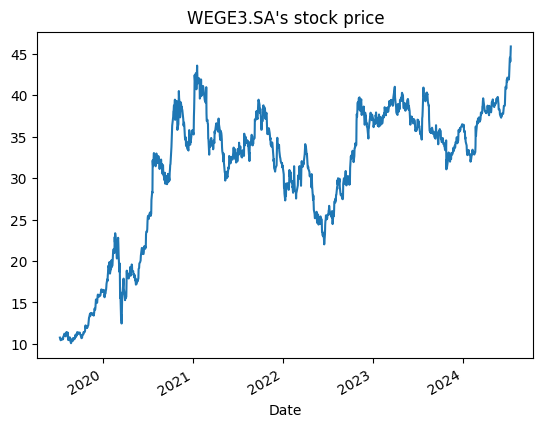

In [174]:
stock = yf.Ticker(tickers[0])
df = stock.history(period="5y")
df['Close'].plot(title="{}'s stock price".format(tickers[0]))

In [175]:
dir(stock)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_analysis',
 '_data',
 '_download_options',
 '_earnings',
 '_earnings_dates',
 '_expirations',
 '_fast_info',
 '_fetch_ticker_tz',
 '_financials',
 '_fundamentals',
 '_get_ticker_tz',
 '_holders',
 '_isin',
 '_lazy_load_price_history',
 '_news',
 '_options2df',
 '_price_history',
 '_quote',
 '_shares',
 '_tz',
 '_underlying',
 'actions',
 'analyst_price_target',
 'balance_sheet',
 'balancesheet',
 'basic_info',
 'calendar',
 'capital_gains',
 'cash_flow',
 'cashflow',
 'dividends',
 'earnings',
 'earnings_dates',
 'earnings_forecasts',
 'earnings_trend',
 'fast_info',
 'financials',
 'get_actions',
 'get

In [176]:
for k,v in stock.info.items():
    print (k, '\t', v, '\n')

address1 	 Avenida Prefeito Waldemar Grubba, 3300 

city 	 Jaraguá do Sul 

state 	 SC 

zip 	 89256-900 

country 	 Brazil 

phone 	 55 47 3276 4000 

website 	 https://www.weg.net/institutional/BR/en/ 

industry 	 Specialty Industrial Machinery 

industryKey 	 specialty-industrial-machinery 

industryDisp 	 Specialty Industrial Machinery 

sector 	 Industrials 

sectorKey 	 industrials 

sectorDisp 	 Industrials 

longBusinessSummary 	 WEG S.A. engages in the production and sale of capital goods in Brazil and internationally. The company offers electric motors, generators, and transformers; gear units and geared motors; hydraulic and steam turbines; frequency converters; motor starters and maneuver devices; control and protection of electric circuits for industrial automation; power sockets and switches; and electric traction solutions for heavy vehicles, SUV vehicles, locomotives, and sea transportation capital goods. It provides solutions for the generation of renewable and distrib

In [177]:
stock.recommendations

,period,strongBuy,buy,hold,sell,strongSell
0,0m,0,0,0,0,0
1,-1m,1,0,9,3,1
2,-2m,1,0,9,3,1
3,-3m,1,0,11,2,0


In [178]:
# stock.sustainability

In [179]:
stock.actions

,Dividends,Stock Splits
Date,,
2019-07-29 00:00:00-03:00,0.04,0.00
2019-09-23 00:00:00-03:00,0.02,0.00
2019-12-23 00:00:00-03:00,0.02,0.00
2020-02-26 00:00:00-03:00,0.08,0.00
2020-03-23 00:00:00-03:00,0.02,0.00
2020-06-29 00:00:00-03:00,0.02,0.00
2020-07-27 00:00:00-03:00,0.06,0.00
2020-09-28 00:00:00-03:00,0.02,0.00
2020-12-21 00:00:00-03:00,0.02,0.00


In [180]:
stock.dividends

Date
2019-07-29 00:00:00-03:00   0.04
2019-09-23 00:00:00-03:00   0.02
2019-12-23 00:00:00-03:00   0.02
2020-02-26 00:00:00-03:00   0.08
2020-03-23 00:00:00-03:00   0.02
2020-06-29 00:00:00-03:00   0.02
2020-07-27 00:00:00-03:00   0.06
2020-09-28 00:00:00-03:00   0.02
2020-12-21 00:00:00-03:00   0.02
2021-03-01 00:00:00-03:00   0.17
2021-03-29 00:00:00-03:00   0.02
2021-06-28 00:00:00-03:00   0.02
2021-08-02 00:00:00-03:00   0.16
2021-09-27 00:00:00-03:00   0.02
2021-12-20 00:00:00-03:00   0.03
2022-02-21 00:00:00-03:00   0.21
2022-03-28 00:00:00-03:00   0.04
2022-06-27 00:00:00-03:00   0.04
2022-07-25 00:00:00-03:00   0.13
2022-09-26 00:00:00-03:00   0.04
2022-12-19 00:00:00-03:00   0.05
2023-02-22 00:00:00-03:00   0.23
2023-03-20 00:00:00-03:00   0.05
2023-06-26 00:00:00-03:00   0.06
2023-07-24 00:00:00-03:00   0.15
2023-09-25 00:00:00-03:00   0.06
2023-12-18 00:00:00-03:00   0.07
2024-02-26 00:00:00-03:00   0.30
2024-03-25 00:00:00-03:00   0.06
2024-07-01 00:00:00-03:00   0.06
Name:

In [181]:
stock.info

{'address1': 'Avenida Prefeito Waldemar Grubba, 3300',
 'city': 'Jaraguá do Sul',
 'state': 'SC',
 'zip': '89256-900',
 'country': 'Brazil',
 'phone': '55 47 3276 4000',
 'website': 'https://www.weg.net/institutional/BR/en/',
 'industry': 'Specialty Industrial Machinery',
 'industryKey': 'specialty-industrial-machinery',
 'industryDisp': 'Specialty Industrial Machinery',
 'sector': 'Industrials',
 'sectorKey': 'industrials',
 'sectorDisp': 'Industrials',
 'longBusinessSummary': 'WEG S.A. engages in the production and sale of capital goods in Brazil and internationally. The company offers electric motors, generators, and transformers; gear units and geared motors; hydraulic and steam turbines; frequency converters; motor starters and maneuver devices; control and protection of electric circuits for industrial automation; power sockets and switches; and electric traction solutions for heavy vehicles, SUV vehicles, locomotives, and sea transportation capital goods. It provides solutions f

In [182]:
stock.info['dividendYield']

0.0055

In [183]:
stock.info['beta']

0.619

In [184]:
list(map(lambda x: stock.info[x], 
         ['targetLowPrice', 'targetMeanPrice','targetMedianPrice','targetHighPrice']))

[34.0, 43.4, 42.0, 52.0]

In [185]:
stock.info['industry']

'Specialty Industrial Machinery'

In [186]:
stock.major_holders

YFDataException: Failed to parse holders json data.

In [ ]:
stock.institutional_holders

,Date Reported,Holder,pctHeld,Shares,Value
0,2023-09-30,"Boston Common Asset Management, LLC",0.00,1761486,63889097


In [ ]:

# Obter histórico de preços
hist = stock.history(period="5y")
hist.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-07-08 00:00:00-03:00,42.19,44.47,42.18,44.47,11694400,0.00,0.00
2024-07-09 00:00:00-03:00,44.09,44.60,44.05,44.55,5605400,0.00,0.00
2024-07-10 00:00:00-03:00,44.55,44.84,43.92,44.05,4993800,0.00,0.00
2024-07-11 00:00:00-03:00,43.90,44.96,43.90,44.96,5502300,0.00,0.00
2024-07-12 00:00:00-03:00,44.96,46.46,44.95,45.88,8072900,0.00,0.00


In [ ]:
stock.get_cashflow()

,2023-12-31,2022-12-31,2021-12-31,2020-12-31,2019-12-31
FreeCashFlow,"5,363,198,000.00","1,762,521,000.00","208,714,000.00","3,371,486,000.00",NaN
RepurchaseOfCapitalStock,"-40,396,000.00","-10,333,000.00",NaN,"-4,360,000.00",NaN
RepaymentOfDebt,"-3,534,389,000.00","-2,110,718,000.00","-241,149,000.00","-1,674,612,000.00",NaN
IssuanceOfDebt,"2,916,805,000.00","4,253,529,000.00","386,533,000.00","211,487,000.00",NaN
IssuanceOfCapitalStock,"3,149,000.00","2,813,000.00","4,563,000.00",NaN,"3,842,000.00"
CapitalExpenditure,"-1,658,625,000.00","-1,174,410,000.00","-847,344,000.00","-558,546,000.00",NaN
EndCashPosition,"6,488,454,000.00","4,451,002,000.00","2,714,427,000.00","3,892,140,000.00",NaN
BeginningCashPosition,"4,451,002,000.00","2,714,427,000.00","3,892,140,000.00","1,946,044,000.00",NaN
EffectOfExchangeRateChanges,"-306,714,000.00","-91,873,000.00","10,177,000.00","169,290,000.00",NaN
ChangesInCash,"2,344,166,000.00","1,828,448,000.00","-1,187,890,000.00","1,776,806,000.00",NaN


In [ ]:
pd.DataFrame(stock.calendar)


,Ex-Dividend Date,Earnings Date,Earnings High,Earnings Low,Earnings Average,Revenue High,Revenue Low,Revenue Average
0,2024-06-30,2024-07-31,0.35,0.28,0.32,9292840000,9104810000,9211310000


In [ ]:
financials = stock.financials

financials

,2023-12-31,2022-12-31,2021-12-31,2020-12-31
Tax Effect Of Unusual Items,"72,283,524.00","40,135,578.30","8,535,132.70","14,693,545.10"
Tax Rate For Calcs,0.11,0.16,0.16,0.13
Normalized EBITDA,"6,709,981,000.00","5,515,876,000.00","4,847,224,000.00","3,159,789,000.00"
Total Unusual Items,"658,920,000.00","243,689,000.00","54,959,000.00","115,063,000.00"
Total Unusual Items Excluding Goodwill,"658,920,000.00","243,689,000.00","54,959,000.00","115,063,000.00"
Net Income From Continuing Operation Net Minority Interest,"5,731,670,000.00","4,208,084,000.00","3,585,947,000.00","2,340,873,000.00"
Reconciled Depreciation,"628,042,000.00","565,557,000.00","520,178,000.00","451,359,000.00"
Reconciled Cost Of Revenue,"21,702,737,000.00","21,209,235,000.00","16,602,381,000.00","12,032,050,000.00"
EBITDA,"7,368,901,000.00","5,759,565,000.00","4,902,183,000.00","3,274,852,000.00"
EBIT,"6,740,859,000.00","5,194,008,000.00","4,382,005,000.00","2,823,493,000.00"


In [ ]:
stock.cashflow

,2023-12-31,2022-12-31,2021-12-31,2020-12-31,2019-12-31
Free Cash Flow,"5,363,198,000.00","1,762,521,000.00","208,714,000.00","3,371,486,000.00",NaN
Repurchase Of Capital Stock,"-40,396,000.00","-10,333,000.00",NaN,"-4,360,000.00",NaN
Repayment Of Debt,"-3,534,389,000.00","-2,110,718,000.00","-241,149,000.00","-1,674,612,000.00",NaN
Issuance Of Debt,"2,916,805,000.00","4,253,529,000.00","386,533,000.00","211,487,000.00",NaN
Issuance Of Capital Stock,"3,149,000.00","2,813,000.00","4,563,000.00",NaN,"3,842,000.00"
Capital Expenditure,"-1,658,625,000.00","-1,174,410,000.00","-847,344,000.00","-558,546,000.00",NaN
End Cash Position,"6,488,454,000.00","4,451,002,000.00","2,714,427,000.00","3,892,140,000.00",NaN
Beginning Cash Position,"4,451,002,000.00","2,714,427,000.00","3,892,140,000.00","1,946,044,000.00",NaN
Effect Of Exchange Rate Changes,"-306,714,000.00","-91,873,000.00","10,177,000.00","169,290,000.00",NaN
Changes In Cash,"2,344,166,000.00","1,828,448,000.00","-1,187,890,000.00","1,776,806,000.00",NaN


In [ ]:
stock.cash_flow

,2023-12-31,2022-12-31,2021-12-31,2020-12-31,2019-12-31
Free Cash Flow,"5,363,198,000.00","1,762,521,000.00","208,714,000.00","3,371,486,000.00",NaN
Repurchase Of Capital Stock,"-40,396,000.00","-10,333,000.00",NaN,"-4,360,000.00",NaN
Repayment Of Debt,"-3,534,389,000.00","-2,110,718,000.00","-241,149,000.00","-1,674,612,000.00",NaN
Issuance Of Debt,"2,916,805,000.00","4,253,529,000.00","386,533,000.00","211,487,000.00",NaN
Issuance Of Capital Stock,"3,149,000.00","2,813,000.00","4,563,000.00",NaN,"3,842,000.00"
Capital Expenditure,"-1,658,625,000.00","-1,174,410,000.00","-847,344,000.00","-558,546,000.00",NaN
End Cash Position,"6,488,454,000.00","4,451,002,000.00","2,714,427,000.00","3,892,140,000.00",NaN
Beginning Cash Position,"4,451,002,000.00","2,714,427,000.00","3,892,140,000.00","1,946,044,000.00",NaN
Effect Of Exchange Rate Changes,"-306,714,000.00","-91,873,000.00","10,177,000.00","169,290,000.00",NaN
Changes In Cash,"2,344,166,000.00","1,828,448,000.00","-1,187,890,000.00","1,776,806,000.00",NaN


In [41]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
import pandas as pd

def fetch_earnings_data(ticker):
    # Set up Selenium to run headlessly
    options = Options()
    options.headless = True
    options.add_argument("--headless")
    options.add_argument("--disable-gpu")
    options.add_argument("--window-size=1920x1080")

    driver = webdriver.Chrome(options=options)
    url = f"https://finance.yahoo.com/calendar/earnings?symbol={ticker}"
    driver.get(url)

    # Find the rows of the earnings table
    rows = driver.find_elements(By.CSS_SELECTOR, 'table tbody tr')

    data = []

    for row in rows:
        cols = row.find_elements(By.TAG_NAME, 'td')
        cols = [elem.text for elem in cols]
        data.append(cols)

    # Close the WebDriver
    driver.quit()

    # Assuming the data structure is as expected, create a DataFrame
    columns = ['Symbol', 'Company', 'Earnings Date', 'EPS Estimate', 'Reported EPS', 'Surprise(%)']
    df = pd.DataFrame(data, columns=columns)

    return df

# Example usage:
ticker = tickers[0]
earnings_data = fetch_earnings_data(ticker)

# Extract the time and timezone information into a new column
earnings_data['Earnings Time'] = earnings_data['Earnings Date']

earnings_data['EPS Estimate'] = earnings_data['EPS Estimate'].replace('+', '').replace('-', None).astype(float)
earnings_data['Reported EPS'] = earnings_data['Reported EPS'].replace('+', '').replace('-', None).astype(float)


# Extract just the date part from the "Earnings Date" column
earnings_data['Earnings Date'] = earnings_data['Earnings Date'].str.extract(r'(\b\w+ \d{1,2}, \d{4})')

# Convert string date to datetime
earnings_data['Earnings Date'] = pd.to_datetime(earnings_data['Earnings Date'])

earnings_data['Surprise(%)'] = earnings_data['Surprise(%)'].str.replace('+', '').replace('-', None).astype(float)

earnings_data

,Symbol,Company,Earnings Date,EPS Estimate,Reported EPS,Surprise(%),Earnings Time
0,WEGE3.SA,WEG SA,2025-04-30,NaN,NaN,NaN,"Apr 30, 2025, 8 AMBRT"
1,WEGE3.SA,WEG SA,2025-02-19,NaN,NaN,NaN,"Feb 19, 2025, 8 AMBRT"
2,WEGE3.SA,WEG SA,2024-10-30,NaN,NaN,NaN,"Oct 30, 2024, 9 AMBRT"
3,WEGE3.SA,WEG SA,2024-07-31,0.32,NaN,NaN,"Jul 31, 2024, 9 AMBRT"
4,WEGE3.SA,WEG S.A.,2024-05-02,0.31,0.32,1.61,"May 02, 2024, 9 AMBRT"
5,WEGE3.SA,WEG S.A.,2024-02-21,0.32,0.42,28.88,"Feb 21, 2024, 9 AMBRT"
6,WEGE3.SA,WEG S.A.,2023-10-25,0.31,0.31,-0.32,"Oct 25, 2023, 7 AMBRT"
7,WEGE3.SA,WEG S.A.,2023-07-19,0.32,0.33,1.88,"Jul 19, 2023, 3 PMBRT"
8,WEGE3.SA,WEG S.A.,2023-04-26,0.30,0.31,3.67,"Apr 26, 2023, 7 AMBRT"
9,WEGE3.SA,WEG S.A.,2023-02-15,0.29,0.28,-2.44,"Feb 15, 2023, 7 AMBRT"


In [58]:
earnings = earnings_data.dropna().sort_values(by='Earnings Date',ascending=False)

earnings

,Symbol,Company,Earnings Date,EPS Estimate,Reported EPS,Surprise(%),Earnings Time
4,WEGE3.SA,WEG S.A.,2024-05-02,0.31,0.32,1.61,"May 02, 2024, 9 AMBRT"
5,WEGE3.SA,WEG S.A.,2024-02-21,0.32,0.42,28.88,"Feb 21, 2024, 9 AMBRT"
6,WEGE3.SA,WEG S.A.,2023-10-25,0.31,0.31,-0.32,"Oct 25, 2023, 7 AMBRT"
7,WEGE3.SA,WEG S.A.,2023-07-19,0.32,0.33,1.88,"Jul 19, 2023, 3 PMBRT"
8,WEGE3.SA,WEG S.A.,2023-04-26,0.30,0.31,3.67,"Apr 26, 2023, 7 AMBRT"
9,WEGE3.SA,WEG S.A.,2023-02-15,0.29,0.28,-2.44,"Feb 15, 2023, 7 AMBRT"
10,WEGE3.SA,WEG S.A.,2022-10-26,0.23,0.27,17.39,"Oct 26, 2022, 7 AMBRT"
11,WEGE3.SA,WEG S.A.,2022-07-20,0.21,0.21,2.44,"Jul 20, 2022, 2 PMBRT"
12,WEGE3.SA,WEG S.A.,2022-04-27,0.20,0.22,10.00,"Apr 27, 2022, 7 AMBRT"
13,WEGE3.SA,WEG S.A.,2022-02-16,0.20,0.21,5.05,"Feb 16, 2022, 2 PMBRT"


## P/L

In [59]:
import yfinance as yf
import pandas as pd
import numpy as np



# Obtenha o preço de fechamento mais recente
latest_price = hist['Close'].iloc[-1]

# Obtenha o lucro por ação (Earnings Per Share - EPS)
# Aqui estamos assumindo que os dados de lucros (earnings) estão em milhares
eps = earnings['Reported EPS'].iloc[0]
print(f"Latest closing price per share for {ticker}: ${latest_price:.4f}")
print(f"Earnings per share (EPS) for {ticker}: ${eps:.2f}")



Latest closing price per share for WEGE3.SA: $45.8800
Earnings per share (EPS) for WEGE3.SA: $0.32


In [43]:
# Calcule o P/L
pl_ratio = latest_price / eps

print(f"P/L ratio for {ticker}: {pl_ratio:.2f}")

P/L ratio for WEGE3.SA: 109.24


In [53]:
balance_sheet = stock.balance_sheet

balance_sheet

,2023-12-31,2022-12-31,2021-12-31,2020-12-31,2019-12-31
Treasury Shares Number,"2,083,696.00","1,302,592.00","1,306,348.00","1,837,896.00",NaN
Ordinary Shares Number,"4,195,234,302.00","4,196,015,406.00","4,196,011,650.00","4,195,480,102.00",NaN
Share Issued,"4,197,317,998.00","4,197,317,998.00","4,197,317,998.00","4,197,317,998.00",NaN
Net Debt,NaN,NaN,NaN,NaN,"338,925,000.00"
Total Debt,"3,391,960,000.00","4,009,322,000.00","2,111,628,000.00","1,974,106,000.00",NaN
Tangible Book Value,"15,870,840,000.00","13,310,780,000.00","12,054,583,000.00","9,967,690,000.00",NaN
Invested Capital,"20,177,146,000.00","18,294,487,000.00","15,394,086,000.00","13,249,745,000.00",NaN
Working Capital,"10,342,622,000.00","9,390,333,000.00","8,018,062,000.00","6,674,099,000.00",NaN
Net Tangible Assets,"15,870,840,000.00","13,310,780,000.00","12,054,583,000.00","9,967,690,000.00",NaN
Capital Lease Obligations,"556,899,000.00","549,630,000.00","322,513,000.00","287,526,000.00",NaN


In [ ]:
closing_prices = hist['Close']
closing_prices

In [ ]:
balance_sheet.loc['Stockholders Equity', :]

In [ ]:
financials.loc['Net Income', :]

In [ ]:
financials.head()

In [ ]:
from datetime import datetime

dt = financials.columns[0]
dt = datetime.strftime(dt, "%Y-%m-%d")

dt

In [ ]:
type(dt)

In [116]:
closing_prices = pd.DataFrame(hist['Close']).reset_index()

closing_prices['DateStr'] = pd.to_datetime(closing_prices['Date']).dt.date

closing_prices['Year'] = pd.to_datetime(closing_prices['Date']).dt.year


closing_prices.sort_values(by='Date', ascending=False, inplace=True)

closing_prices['Date'] = pd.to_datetime(closing_prices['DateStr'])

closing_prices.head()




,Date,Close,DateStr,Year
1244,2024-07-12,45.88,2024-07-12,2024
1243,2024-07-11,44.96,2024-07-11,2024
1242,2024-07-10,44.05,2024-07-10,2024
1241,2024-07-09,44.55,2024-07-09,2024
1240,2024-07-08,44.47,2024-07-08,2024


In [117]:
closing_prices.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1245 entries, 1244 to 0
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     1245 non-null   datetime64[ns]
 1   Close    1245 non-null   float64       
 2   DateStr  1245 non-null   object        
 3   Year     1245 non-null   int32         
dtypes: datetime64[ns](1), float64(1), int32(1), object(1)
memory usage: 43.8+ KB


In [45]:
closing_prices.tail()

,Date,Close,Year
4,2019-07-18,10.59,2019
3,2019-07-17,10.49,2019
2,2019-07-16,10.48,2019
1,2019-07-15,10.43,2019
0,2019-07-12,10.75,2019


In [118]:
last_prices = pd.DataFrame(closing_prices.groupby(by='Year')['Date'].max())
last_prices

,Date
Year,
2019,2019-12-30
2020,2020-12-30
2021,2021-12-30
2022,2022-12-29
2023,2023-12-28
2024,2024-07-12


In [119]:
prices = pd.merge(closing_prices , last_prices).sort_values(by='Date',ascending=False)

In [120]:
closing_price = closing_prices[(closing_prices['Date'] == '2023-12-28')]['Close']

In [121]:
prices

,Date,Close,DateStr,Year
0,2024-07-12,45.88,2024-07-12,2024
1,2023-12-28,36.50,2023-12-28,2023
2,2022-12-29,37.47,2022-12-29,2022
3,2021-12-30,31.53,2021-12-30,2021
4,2020-12-30,35.79,2020-12-30,2020
5,2019-12-30,16.25,2019-12-30,2019


In [122]:
prices1 = prices.loc[1:]
prices1

,Date,Close,DateStr,Year
1,2023-12-28,36.50,2023-12-28,2023
2,2022-12-29,37.47,2022-12-29,2022
3,2021-12-30,31.53,2021-12-30,2021
4,2020-12-30,35.79,2020-12-30,2020
5,2019-12-30,16.25,2019-12-30,2019


In [142]:

# Exemplo de cálculo de P/L com dados do Yahoo Finance
df_eps = pd.DataFrame(financials.loc['Net Income', :] / balance_sheet.loc['Stockholders Equity', :]).reset_index()

df_eps

,index,0
0,2019-12-31,NaN
1,2020-12-31,0.20
2,2021-12-31,0.26
3,2022-12-31,0.28
4,2023-12-31,0.33


In [187]:
financials.loc['Basic EPS', :]

2023-12-31   1.37
2022-12-31   1.00
2021-12-31   0.85
2020-12-31   0.56
Name: Basic EPS, dtype: object

In [143]:

df_eps.columns = ['Date','eps']



In [144]:
df_eps['Year'] = pd.to_datetime(df_eps['Date']).dt.year

In [145]:
df_eps

,Date,eps,Year
0,2019-12-31,NaN,2019
1,2020-12-31,0.20,2020
2,2021-12-31,0.26,2021
3,2022-12-31,0.28,2022
4,2023-12-31,0.33,2023


In [108]:
type(df_eps)

pandas.core.frame.DataFrame

In [129]:
prices

,Date,Close,DateStr,Year
0,2024-07-12,45.88,2024-07-12,2024
1,2023-12-28,36.50,2023-12-28,2023
2,2022-12-29,37.47,2022-12-29,2022
3,2021-12-30,31.53,2021-12-30,2021
4,2020-12-30,35.79,2020-12-30,2020
5,2019-12-30,16.25,2019-12-30,2019


In [146]:
df_eps

,Date,eps,Year
0,2019-12-31,NaN,2019
1,2020-12-31,0.20,2020
2,2021-12-31,0.26,2021
3,2022-12-31,0.28,2022
4,2023-12-31,0.33,2023


In [147]:
eps_prices = pd.merge(df_eps , prices, on='Year')
eps_prices

,Date_x,eps,Year,Date_y,Close,DateStr
0,2019-12-31,NaN,2019,2019-12-30,16.25,2019-12-30
1,2020-12-31,0.20,2020,2020-12-30,35.79,2020-12-30
2,2021-12-31,0.26,2021,2021-12-30,31.53,2021-12-30
3,2022-12-31,0.28,2022,2022-12-29,37.47,2022-12-29
4,2023-12-31,0.33,2023,2023-12-28,36.50,2023-12-28


In [148]:
prices

#balance_sheet

,Date,Close,DateStr,Year
0,2024-07-12,45.88,2024-07-12,2024
1,2023-12-28,36.50,2023-12-28,2023
2,2022-12-29,37.47,2022-12-29,2022
3,2021-12-30,31.53,2021-12-30,2021
4,2020-12-30,35.79,2020-12-30,2020
5,2019-12-30,16.25,2019-12-30,2019


In [153]:
df_pl_ratio = eps_prices.copy()
df_pl_ratio

,Date_x,eps,Year,Date_y,Close,DateStr
0,2019-12-31,NaN,2019,2019-12-30,16.25,2019-12-30
1,2020-12-31,0.20,2020,2020-12-30,35.79,2020-12-30
2,2021-12-31,0.26,2021,2021-12-30,31.53,2021-12-30
3,2022-12-31,0.28,2022,2022-12-29,37.47,2022-12-29
4,2023-12-31,0.33,2023,2023-12-28,36.50,2023-12-28


In [154]:
df_pl_ratio['pl_ratio'] = df_pl_ratio['Close']/df_pl_ratio['eps']

In [155]:
df_pl_ratio

,Date_x,eps,Year,Date_y,Close,DateStr,pl_ratio
0,2019-12-31,NaN,2019,2019-12-30,16.25,2019-12-30,NaN
1,2020-12-31,0.20,2020,2020-12-30,35.79,2020-12-30,176.79
2,2021-12-31,0.26,2021,2021-12-30,31.53,2021-12-30,119.61
3,2022-12-31,0.28,2022,2022-12-29,37.47,2022-12-29,132.09
4,2023-12-31,0.33,2023,2023-12-28,36.50,2023-12-28,110.43


In [ ]:
prices/eps

In [ ]:
#
# stock.info


Calculando P/L (Preço/Lucro)
df['P/L'] = df['price_per_share'] / df['earnings_per_share']

Calculando P/VP (Preço/Valor Patrimonial)
df['P/VP'] = df['price_per_share'] / df['book_value_per_share']

Calculando P/S (Preço/Vendas)
df['P/S'] = df['price_per_share'] / df['sales_per_share']

Calculando PEG (Price to Earnings Growth)
df['PEG'] = df['P/L'] / df['growth_rate']

Calculando ROE (Retorno sobre o Patrimônio Líquido)
df['ROE'] = df['earnings_per_share'] / df['book_value_per_share']

